<a href="https://colab.research.google.com/github/ourruti/EstadisticaQ2/blob/main/Ejercicio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EJERCICIO 1

## CARGA DE LA BASE DE DATOS
Selecciona el archivo ejercicio2.csv de tu PC



In [27]:
from google.colab import files

# Cargar un archivo desde tu PC
uploaded = files.upload()

# Para ver los archivos que fueron cargados
import pandas as pd

# Para leer el archivo y manejar el error de codificación
for filename in uploaded.keys():
    try:
        df = pd.read_csv(filename, encoding='latin1')  # Cambia 'latin1' por la codificación correcta si es necesario
        print(f'Archivo cargado: {filename}')
        print(df.head())  # Muestra las primeras filas del DataFrame
    except Exception as e:
        print(f'Error al cargar el archivo {filename}: {e}')

Saving Ejercicio2.csv to Ejercicio2 (3).csv
Archivo cargado: Ejercicio2 (3).csv
   ID                      HP       City   Time        Day      BW  BPD   AD  \
0   1  H.G.U.Gregorio Marañón     Madrid  13:20    Viernes  2200.0   82   90   
1   2        H.U.de Bellvitge  Barcelona  11:00      Lunes  4100.0   97  129   
2   3        H.U.de Bellvitge  Barcelona  00:00     Martes  4200.0   97  133   
3   4                H.Clínic  Barcelona  18:38     Jueves  1300.0   74   71   
4   5       H.U.12 de octubre     Madrid  09:53  Miércoles  1150.0   68   80   

  Sex  Ge Sm  
0   M  33  N  
1   M  43  N  
2   F  43  N  
3   M  33  S  
4   F  33  S  


##Visualiza la dataset

In [44]:
df.head()

,ID,HP,City,Time,Day,BW,BPD,AD,Sex,Ge,Sm
0,1,H.G.U.Gregorio Marañón,Madrid,13:20,Viernes,2200.0,82,90,M,33,N
1,2,H.U.de Bellvitge,Barcelona,11:00,Lunes,4100.0,97,129,M,43,N
2,3,H.U.de Bellvitge,Barcelona,00:00,Martes,4200.0,97,133,F,43,N
3,4,H.Clínic,Barcelona,18:38,Jueves,1300.0,74,71,M,33,S
4,5,H.U.12 de octubre,Madrid,09:53,Miércoles,1150.0,68,80,F,33,S
5,6,H.G.U.Gregorio Marañón,Madrid,05:40,Sábado,3400.0,94,110,F,39,N
6,7,H.M.I. Virgen de las Nieves,Granada,09:33,Miércoles,2500.0,87,105,F,34,N
7,8,C.U.Navarra,Pamplona,06:51,Viernes,3100.0,92,109,F,37,N
8,9,H.U.La Paz,Madrid,08:25,Miércoles,2550.0,86,106,F,34,N
9,10,C.U.Navarra,Pamplona,12:52,Viernes,2600.0,93,102,F,34,N


## Realizar un análisis descriptivo visual  y evaluar las correlaciones entre las variables numéricas. (0.5 punto).

Si las variables son numéricas, utilizad histogramas y gráficos de cajas, si son categóricas, gráfico de barras.

En colab, podemos utilizar Géminis que nos ayude!!

In [ ]:
## Insertar el código aquí

## Asunción de normalidad. Evaluar si las variables numéricas provienen de una distribución normal y si se ajustan a las exigencias de un test ANOVA (0.5).
Evaluar un test ANOVA que analice el peso del bebé y la categoría “madre fumadora”, y también un test NO paramétrico (1 punto).


In [5]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Análisis ANOVA
model = ols('BW ~ C(Sm)', data=df).fit()  # C(Sm) considera 'Sm' como categórica
anova_result = sm.stats.anova_lm(model, typ=1)
print("Resultados del ANOVA:\n", anova_result)

Resultados del ANOVA:
              df        sum_sq       mean_sq          F        PR(>F)
C(Sm)       1.0  7.855894e+07  7.855894e+07  247.58042  5.018560e-41
Residual  298.0  9.455742e+07  3.173068e+05        NaN           NaN


In [6]:
# Test no paramétrico: Kruskal-Wallis
# Agrupar datos por los grupos de fumadores y no fumadores
grouped_data = [group['BW'].values for name, group in df.groupby('Sm')]
kruskal_result = stats.kruskal(*grouped_data)
print("\nResultados del Test de Kruskal-Wallis:")
print(f'Estadística: {kruskal_result.statistic}, p-valor: {kruskal_result.pvalue}')


Resultados del Test de Kruskal-Wallis:
Estadística: 129.72776606466724, p-valor: 4.700148357087779e-30


In [47]:
df.columns

Index(['ID', 'HP', 'City', 'Time', 'Day', 'BW', 'BPD', 'AD', 'Sex', 'Ge',
       'Sm'],
      dtype='object')

## Vamos a definir la variable peso del bebé como variable dependiente. Y vamos a realizar los siguientes cálculos:
-	Entre las variables numéricas, escoger el modelo de regresión lineal simple que tenga mayor “bondad” en el ajuste (0.5 puntos).


In [49]:
X = df[['AD', 'BPD', 'Ge']]
y = df['BW']

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
import statsmodels.api as sm
X = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     BW   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1024.
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          5.80e-135
Time:                        13:05:49   Log-Likelihood:                -1621.9
No. Observations:                 240   AIC:                             3252.
Df Residuals:                     236   BIC:                             3266.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6562.8498    201.637    -32.548      0.0

# Comentar los resultados

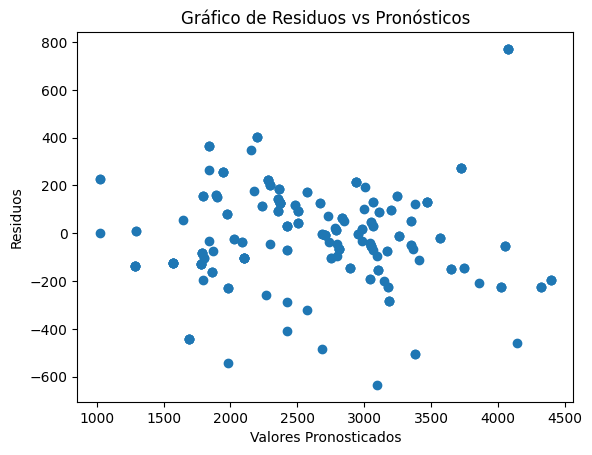

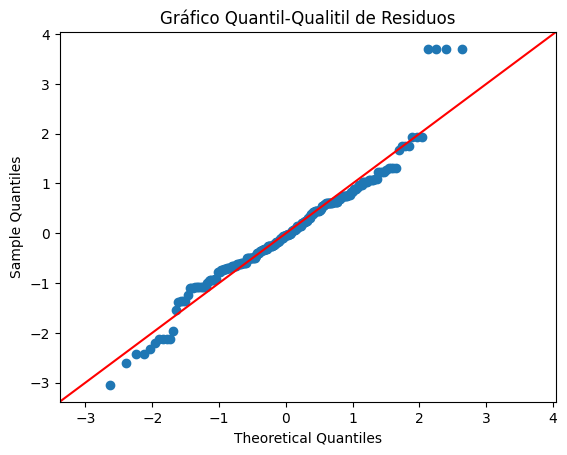

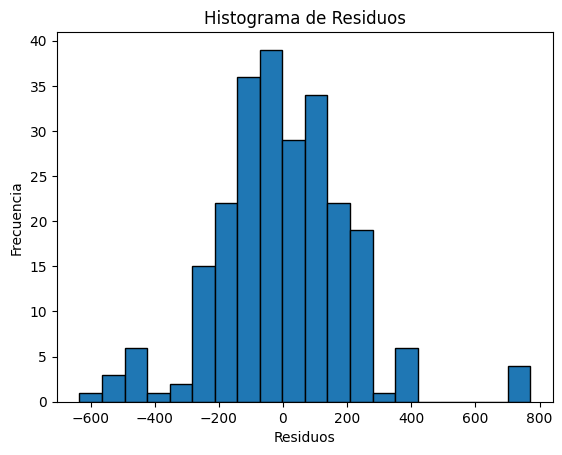

In [60]:
import matplotlib.pyplot as plt
# Gráfico de residuos vs predicciones
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Valores Pronosticados')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs Pronósticos')
plt.show()

# Q-Q Plot para verificar la normalidad de los residuos
sm.qqplot(model.resid, line='45', fit=True)
plt.title('Gráfico Quantil-Qualitil de Residuos')
plt.show()

# Histograma de los residuos
plt.hist(model.resid, bins=20, edgecolor='black')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()

In [62]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calcular métricas
mse = mean_squared_error(y_test, model.predict(X_test))
rmse = np.sqrt(mse)
r2 = r2_score(y_test, model.predict(X_test))

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Squared Error (MSE): 41314.3991
Root Mean Squared Error (RMSE): 203.2594
R^2 Score: 0.9065


# Explicar el siguiente gráfico

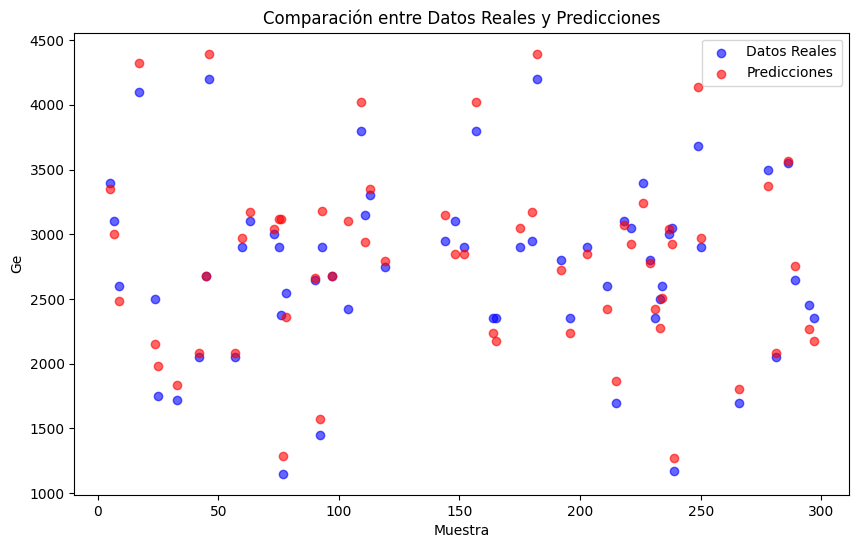

In [66]:
# Predicciones
y_pred = model.predict(X_test)

# Crear el gráfico
plt.figure(figsize=(10, 6))  # Tamaño de la figura

# Datos reales
plt.scatter(y_test.index, y_test, color='blue', label='Datos Reales', alpha=0.6)
# Predicciones como puntos rojos
plt.scatter(y_test.index, y_pred, color='red', label='Predicciones', alpha=0.6)

# Etiquetas y título
plt.xlabel('Muestra')
plt.ylabel('Ge')
plt.title('Comparación entre Datos Reales y Predicciones')

# Leyenda
plt.legend()

# Mostrar el gráfico
plt.show()